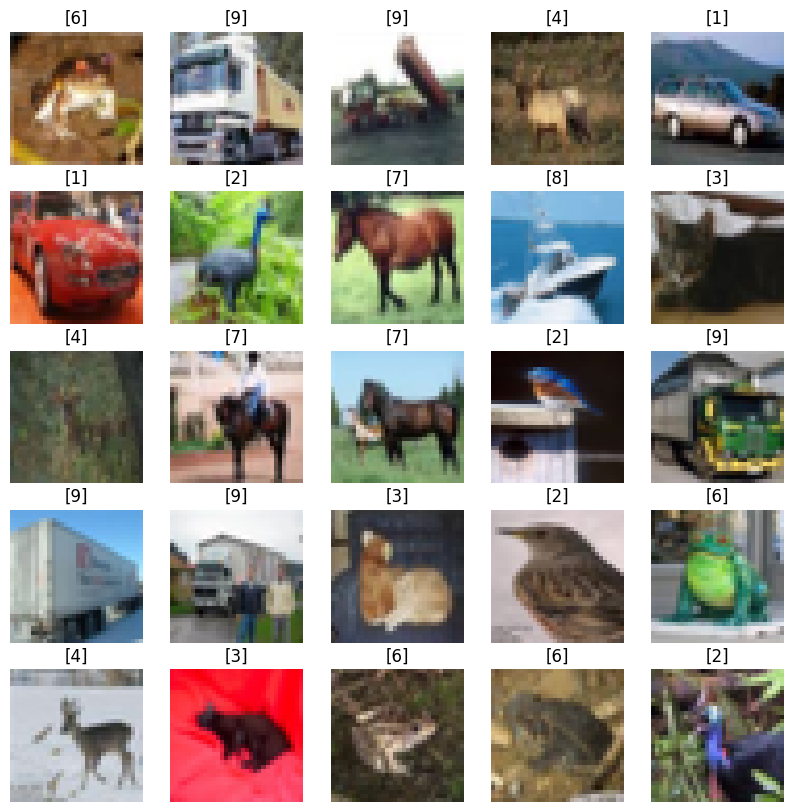

Epoch 1/15
1563/1563 [==============================] - 76s 48ms/step - loss: 1.5378 - accuracy: 0.4368 - val_loss: 1.2627 - val_accuracy: 0.5386
Epoch 2/15
1563/1563 [==============================] - 68s 44ms/step - loss: 1.1851 - accuracy: 0.5797 - val_loss: 1.1139 - val_accuracy: 0.6054
Epoch 3/15
1563/1563 [==============================] - 69s 44ms/step - loss: 1.0390 - accuracy: 0.6338 - val_loss: 1.0027 - val_accuracy: 0.6486
Epoch 4/15
1563/1563 [==============================] - 67s 43ms/step - loss: 0.9424 - accuracy: 0.6665 - val_loss: 0.9404 - val_accuracy: 0.6749
Epoch 5/15
1563/1563 [==============================] - 68s 44ms/step - loss: 0.8744 - accuracy: 0.6948 - val_loss: 0.9264 - val_accuracy: 0.6707
Epoch 6/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.8205 - accuracy: 0.7109 - val_loss: 0.9529 - val_accuracy: 0.6692
Epoch 7/15
1563/1563 [==============================] - 69s 44ms/step - loss: 0.7692 - accuracy: 0.7297 - val_loss: 0.8910 -

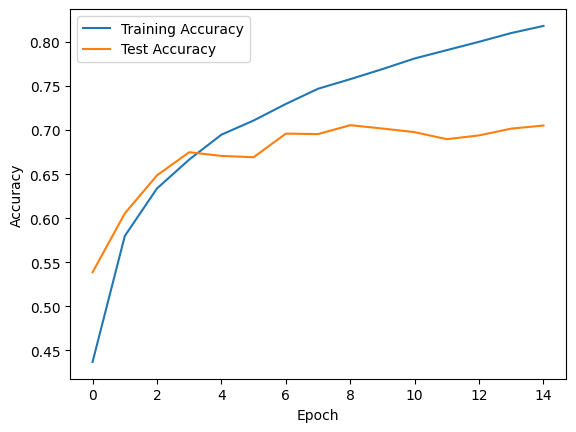

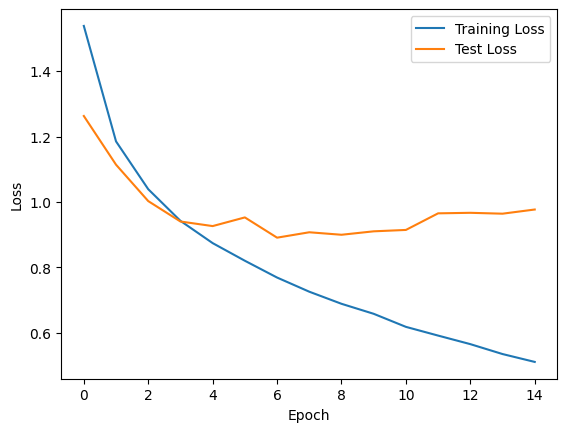

TypeError: ignored

In [3]:
import tensorflow as tf
from tensorflow.keras import layers, models, datasets
import matplotlib.pyplot as plt

# 1.1 Prepare the Dataset
# Load and preprocess CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images / 255.0, test_images / 255.0  # Normalize pixel values

# 1.2 Visualize a sample of the dataset
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(train_images[i], cmap='viridis')
    plt.title(str(train_labels[i]))
    plt.axis('off')
plt.show()
batch_size = 32
# 1.3 The CNN Model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 1.3 Training the network
def train_model(model, train_data, train_labels, test_data, test_labels, epochs=15, lr=0.001):
    optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    train_dataset = tf.data.Dataset.from_tensor_slices((train_data, train_labels))
    test_dataset = tf.data.Dataset.from_tensor_slices((test_data, test_labels))

    # Shuffle and batch the datasets
    train_dataset = train_dataset.shuffle(buffer_size=len(train_data)).batch(batch_size)
    test_dataset = test_dataset.batch(batch_size)

    history = model.fit(train_dataset, epochs=epochs, validation_data=test_dataset)
    return history

# Train the model
history = train_model(model, train_images, train_labels, test_images, test_labels, epochs=15)

# 1.4 Visualization
# Visualize performance
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 2. Adjust hyperparameters and architecture
learning_rates = [0.001, 0.01]
architectures = [([32, 64], [64]), ([64, 128], [128])]
optimizers = ['adam', 'sgd']

for lr in learning_rates:
    for arch in architectures:
        for opt in optimizers:
            # Modify the model architecture and hyperparameters based on lr, arch, and opt
            modified_model = models.Sequential()
            #  Build  modified model

            # Train the modified model
            modified_history = train_model(modified_model, train_data=(train_images, train_labels),
                                           test_data=(test_images, test_labels), lr=lr)

            # Plot results
            plt.plot(modified_history.history['accuracy'], label='Training Accuracy')
            plt.plot(modified_history.history['val_accuracy'], label='Test Accuracy')
            plt.xlabel('Epoch')
            plt.ylabel('Accuracy')
            plt.title(f'LR={lr}, Architecture={arch}, Optimizer={opt}')
            plt.legend()
            plt.show()

            plt.plot(modified_history.history['loss'], label='Training Loss')
            plt.plot(modified_history.history['val_loss'], label='Test Loss')
            plt.xlabel('Epoch')
            plt.ylabel('Loss')
            plt.title(f'LR={lr}, Architecture={arch}, Optimizer={opt}')
            plt.legend()
            plt.show()